## 7.1 Breakoutを実行してみる

Windowsでbreakout-v0を実行するために、事前に以下のコマンドを実行してください。

pip install --no-index -f https://github.com/Kojoley/atari-py/releases atari_py

pip install opencv-python



In [2]:
# パッケージのimport
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym


In [4]:
# ゲームの開始
ENV = 'Breakout-v0'  # 使用する課題名
env = gym.make(ENV)  # 実行する課題を設定


In [6]:
# ゲームの状態と行動を把握

# 状態
print(env.observation_space)
# Box(210, 160, 3)

# 行動
print(env.action_space)
print(env.unwrapped.get_action_meanings())
# Discrete(4)
# ['NOOP', 'FIRE', 'RIGHT', 'LEFT']、 0: 何もしない、1: 玉を発射、2：右へ移動、3: 左へ移動


Box(0, 255, (210, 160, 3), uint8)
Discrete(4)
['NOOP', 'FIRE', 'RIGHT', 'LEFT']


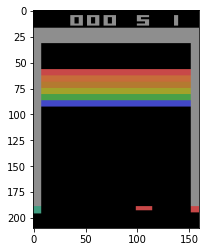

In [8]:
# 初期状態を描画してみる
observation = env.reset()  # 環境の初期化
plt.imshow(observation)  # 描画してみましょう


In [10]:
# 動画の描画関数の宣言
# 参考URL http://nbviewer.jupyter.org/github/patrickmineault
# /xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display


def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0),
               dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames),
                                   interval=50)

    anim.save('breakout.mp4')  # 動画のファイル名と保存です
    display(display_animation(anim, default_mode='loop'))


In [11]:
# 適当に動かしてみましょう

frames = []  # 画像を格納していく変数
observation = env.reset()  # 環境の初期化

for step in range(1000):  # 最大1000エピソードのループ
    frames.append(observation)  # 変換せずに画像を保存
    action = np.random.randint(0, 4)  # 0～3のランダムな行動を求める
    observation_next, reward, done, info = env.step(action)  # 実行

    observation = observation_next  # 状態の更新

    if done:  # 終了したらループから抜ける
        break

display_frames_as_gif(frames)  # 動画を保存と描画してみよう


AttributeError: 'HTMLWriter' object has no attribute '_temp_names'

In [7]:
# 以上でBreakoutをランダムに動かすことができました。
# つづいて強化学習を適用していきましょう。
